In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


For easy access, we are storing the path in different variables

In [ ]:
train_path='/content/drive/MyDrive/dataset/train'
valid_path='/content/drive/MyDrive/dataset/validation'
test_path='/content/drive/MyDrive/dataset/test'

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator



**ImageDataGenerator**

Generate batches of tensor image data with real-time data augmentation

[To learn more about ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

In [ ]:
train_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path,target_size=(224,224),classes=['Amoeba','Euglena','Hydra','Paramecium','Rod_bacteria','Spherical_bacteria','Spiral_bacteria','Yeast'],batch_size=50)
valid_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path,target_size=(224,224),classes=['Amoeba','Euglena','Hydra','Paramecium','Rod_bacteria','Spherical_bacteria','Spiral_bacteria','Yeast'],batch_size=50)
test_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path,target_size=(224,224),classes=['Amoeba','Euglena','Hydra','Paramecium','Rod_bacteria','Spherical_bacteria','Spiral_bacteria','Yeast'],batch_size=50,shuffle=False)

Found 633 images belonging to 8 classes.
Found 79 images belonging to 8 classes.
Found 77 images belonging to 8 classes.


In [ ]:
imgs,labels=next(train_batches)

To see the output of datagenerator we are creating custom function which displays 10 images 

In [ ]:
# this fncn will plot imgs in the form of 1x10 where imgs are placed
def plotImages(images_arr):
  fig,axes=plt.subplots(1,10,figsize=(20,20))
  axes=axes.flatten()
  for img,ax in zip(images_arr,axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

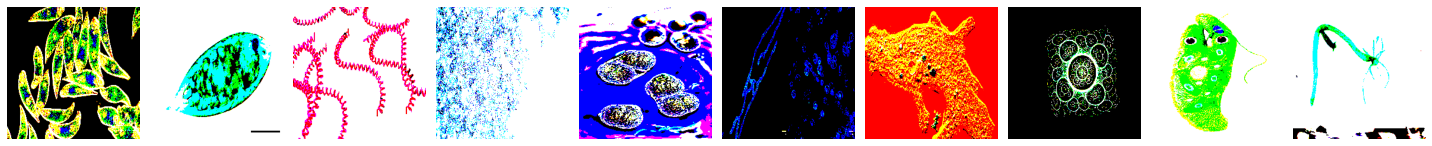

[[0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 

In [ ]:
import matplotlib.pyplot as plt

plotImages(imgs)
print(labels)

Importing necessary packages for convolution neural network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense,Flatten,BatchNormalization,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [ ]:

model = Sequential()

# Layer 1: Convolutional layer with 32 filters, 3x3 kernel size, and ReLU activation
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))

# Layer 2: Max pooling layer with 2x2 pool size
model.add(MaxPool2D(pool_size=(2, 2)))

# Layer 3: Convolutional layer with 64 filters, 3x3 kernel size, and ReLU activation
model.add(Conv2D(64, (3, 3), activation='relu'))

# Layer 4: Max pooling layer with 2x2 pool size
model.add(MaxPool2D(pool_size=(2, 2)))

# Layer 5: Convolutional layer with 128 filters, 3x3 kernel size, and ReLU activation
model.add(Conv2D(128, (3, 3), activation='relu'))

# Layer 6: Max pooling layer with 2x2 pool size
model.add(MaxPool2D(pool_size=(2, 2)))

# Layer 7: Flatten layer to convert the output of the previous layer into a 1D array
model.add(Flatten())

# Layer 8: Fully connected layer with 512 neurons and ReLU activation
model.add(Dense(512, activation='relu'))

# Output layer: Fully connected layer with 10 neurons (one for each class) and softmax activation
model.add(Dense(8, activation='softmax'))

In [ ]:
# model=Sequential([
#                   Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same',input_shape=(224,224,3)), #param=(3*3*3+1)*32
#                   MaxPool2D(pool_size=(2,2),strides=2),
#                   Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'),  #param=(3*3*32+1)*64
#                   MaxPool2D(pool_size=(2,2),strides=2),
#                   Flatten(),
#                   Dense(units=2,activation='softmax'), #param=size of flatten*2+2
# ])

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x=train_batches,validation_data=valid_batches,epochs=15,verbose=1)

Epoch 1/15
13/13 [==============================] - 123s 9s/step - loss: 0.0510 - accuracy: 0.9874 - val_loss: 10.2354 - val_accuracy: 0.3418
Epoch 2/15
13/13 [==============================] - 109s 8s/step - loss: 0.0324 - accuracy: 0.9889 - val_loss: 10.3349 - val_accuracy: 0.3165
Epoch 3/15
13/13 [==============================] - 100s 8s/step - loss: 0.0317 - accuracy: 0.9905 - val_loss: 10.4104 - val_accuracy: 0.3291
Epoch 4/15
13/13 [==============================] - 97s 7s/step - loss: 0.0238 - accuracy: 0.9905 - val_loss: 10.8625 - val_accuracy: 0.3291
Epoch 5/15
13/13 [==============================] - 102s 8s/step - loss: 0.0212 - accuracy: 0.9905 - val_loss: 11.0360 - val_accuracy: 0.3544
Epoch 6/15
13/13 [==============================] - 101s 8s/step - loss: 0.0193 - accuracy: 0.9905 - val_loss: 11.2058 - val_accuracy: 0.3671
Epoch 7/15
13/13 [==============================] - 101s 8s/step - loss: 0.0191 - accuracy: 0.9905 - val_loss: 11.1946 - val_accuracy: 0.3544
Epoch 8

In [ ]:
predictions=model.predict(x=test_batches,verbose=0)

In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [ ]:
cm=confusion_matrix(y_true=test_batches.classes,y_pred=np.argmax(predictions,axis=-1))

In [ ]:

def plot_confusion_matrix(cm,classes,normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

  """
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes, rotation=45)
    plt.yticks(tick_marks,classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion Matrix,without Normalization')
    print(cm)


    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      
            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
      


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix,without Normalization
[[1 2 0 3 0 0 0 0]
 [2 5 1 2 1 2 2 1]
 [1 2 1 2 0 1 0 0]
 [2 3 0 8 0 1 1 1]
 [0 1 1 0 2 3 1 0]
 [0 0 1 2 3 1 1 0]
 [0 1 0 4 1 1 1 0]
 [0 2 0 3 1 0 1 1]]


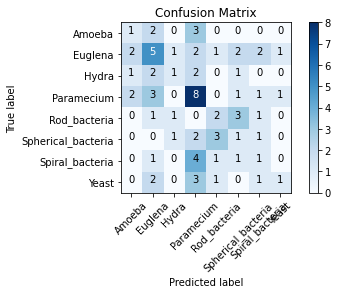

In [ ]:
cm_plot_labels=['Amoeba','Euglena','Hydra','Paramecium','Rod_bacteria','Spherical_bacteria','Spiral_bacteria','Yeast']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion Matrix')

In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_true=test_batches.classes,y_pred=np.argmax(predictions,axis=-1), average='macro')
print('F1 score:', f1)

F1 score: 0.6921
